<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/GIS3_GeoDataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GeoDataFrame の作り方
geopandas で用いられる地理情報データは GeoDataFrame という形式に格納される。
これは pandas のデータフレームの拡張と位置付けられる。

以下では，自分で GeoDataFrame を作成することで，その仕組みを理解しよう。
- GeoDataframe を構成する基本的な部品が Point, LineString, Polygon である。
- 他にも MultiPoint や MultiPolygon が存在するが，ここでは取り上げない。

### (準備) 必要なライブラリのインストール

In [4]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.9MB/s 
     |████████████████████████████████| 14.8MB 308kB/s 
     |████████████████████████████████| 10.9MB 37.1MB/s 


## Point (点) を作る
基本的な部品である Point (点) を含む GeoDataFrame を作ってみる。

部品を生成するには shapely.geometry を用いる。

In [5]:
# 必要なライブラリのインポート
import geopandas as gpd
from shapely.geometry import Point

最初に Point を定義し，これらを GeoDataFrame のコンストラクタへ渡す。
ここで列名として "geometry" を指定する必要がある。

In [6]:
# Point(点)の定義
point1 = Point(10, 10)
point2 = Point(20, 20)

# 点を GeoDataFrame の grometry 列へ格納
points = gpd.GeoDataFrame([[point1], [point2]], columns=['geometry'])

In [7]:
# データの中身を覗き見る
points

,geometry
0,POINT (10.00000 10.00000)
1,POINT (20.00000 20.00000)


In [8]:
# 定義された Point の型を確認
type(point1)

shapely.geometry.point.Point

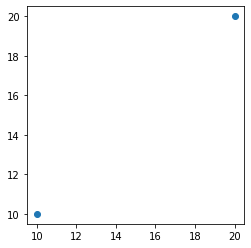

In [9]:
# 可視化：座標 (10, 10) と (20, 20) に点が位置することが分かる
points.plot()

## Polygon (多角形) を作る
Polygon (多角形) はその頂点の並びとして定義される。

In [10]:
# 必要なライブラリのインポート
import geopandas as gpd
from shapely.geometry import Polygon

In [11]:
# polygon を作る場合，境界線を結ぶ順番に座標を並べる
cordinates = [(12, 12), (18, 12), (18, 18), (12, 18)]

# ポリゴンを GeoDataFrame の grometry 列へ格納
polygon = gpd.GeoDataFrame([Polygon(cordinates)], columns=['geometry'])

In [12]:
# データの中身を覗き見る
polygon

,geometry
0,"POLYGON ((12.00000 12.00000, 18.00000 12.00000..."


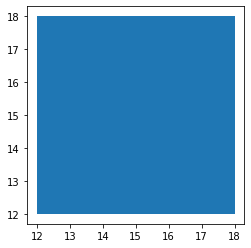

In [13]:
# 可視化
polygon.plot()

ちなみに，ポリゴンの頂点の並びを変えてみると，思いがけない形状となる。
一般にポリゴンは領域を表現するため，座標の並び順に注意が必要である。

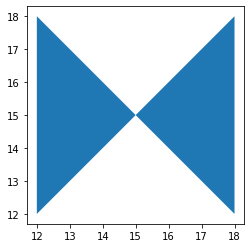

In [14]:
# 適当に座標を並べた例
cordinates = [(12, 12), (12, 18), (18, 12), (18, 18)]

# ポリゴンを GeoDataFrame の grometry 列へ格納
funny_polygon = gpd.GeoDataFrame([Polygon(cordinates)], columns=['geometry'])

funny_polygon.plot()

## 生成した GeoDataFrame を shapefile として保存 & 読み込み

### (準備) Google Drive のマウント

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# shape file の作成
path = r'/content/drive/My Drive/BASE2/GeoData/output.shp'
polygon.to_file(path)

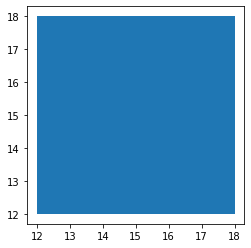

In [20]:
# shape file を試しに読み込んで表示する
path = r'/content/drive/My Drive/BASE2/GeoData/output.shp'
data = gpd.read_file(path)
data.plot()

# GeoDataFrame に対する操作（このセクションは重要）

## Point と Polygon を重ねて表示
上記で定義した Point と Polygon を重ねて表示してみよう。

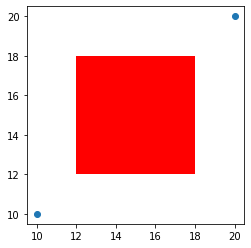

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
points.plot(ax=ax)
polygon.plot(ax=ax, color='red')

## ポリゴンの面積と中心を求める
ポリゴンの面積を求めるには area 属性を，中心点を求めるには centroid 属性を指定する。

0    36.0
dtype: float64


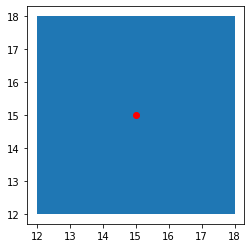

In [22]:
print(polygon.area)

ax = polygon.plot()
polygon.centroid.plot(ax=ax, color='red')

## Point 間の距離を測る

In [23]:
point1.distance(point2)

14.142135623730951